# Model Evaluation Visualisations for KNN Classifier

This section provides a detailed explanation of various visualisations that can be used to evaluate and improve the performance of a K-Nearest Neighbours (KNN) model. These plots help us detect overfitting, underfitting, performance differences across classes, and optimal hyperparameters.

---

## 1. Accuracy vs. K Plot

**Purpose:**  
This plot helps determine the optimal number of neighbours (`k`) for the KNN algorithm. It shows how training and validation accuracy change as `k` increases.

**Interpretation:**  
- If accuracy is low for all `k`, the model might be underfitting.
- If training accuracy is high and validation is low for small `k`, the model may be overfitting.
- Choose the `k` where the validation accuracy is high and stable.

---

## 2. Learning Curve

**Purpose:**  
The learning curve plots training and validation accuracy against the number of training examples.

**Interpretation:**
- If both training and validation scores are low → **underfitting**
- If training is high but validation is low → **overfitting**
- If both scores are high and close → **good generalisation**

---

## 3. Confusion Matrix with Precision, Recall, F1 Score

**Purpose:**  
Displays how well the model performs per class by showing actual vs predicted labels. It is useful for multi-class classification problems.

**Additional Metrics Shown:**
- **Accuracy** – Overall correct predictions
- **Precision** – Correct positive predictions / Total predicted positives
- **Recall** – Correct positive predictions / Total actual positives
- **F1 Score** – Harmonic mean of precision and recall

---

## 4. ROC Curve (One-vs-Rest)

**Purpose:**  
Useful in binary or multiclass classification to evaluate trade-offs between true positive rate and false positive rate for each class.

**Interpretation:**
- AUC (Area Under Curve) close to 1 = good classifier.
- AUC close to 0.5 = no better than random guessing.

---

## 5. Decision Boundary (2D Visualisation)

**Purpose:**  
Helps visualise how the KNN classifier separates different classes in a 2D feature space.

**Interpretation:**
- Clear and smooth boundaries with accurate test classification indicate a good fit.
- Irregular and noisy boundaries may indicate overfitting.

*Note: This is only possible when using two features, or after dimensionality reduction (e.g., PCA).*

---

## 6. Error Analysis Plot (Correct vs Incorrect Predictions)

**Purpose:**  
Visualises how many predictions were correct or incorrect for each class.

**Interpretation:**
- Helps identify which classes the model struggles to classify correctly.
- Useful for identifying class imbalance or confusion between similar classes.

---

## Summary of Visualisations

| Visualisation               | Purpose                                      |
|----------------------------|----------------------------------------------|
| Accuracy vs. K             | Choose the optimal number of neighbours      |
| Learning Curve             | Diagnose underfitting or overfitting         |
| Confusion Matrix + Metrics | Evaluate class-level prediction performance  |
| ROC / PR Curve             | Assess model on class imbalance              |
| Decision Boundary (2D)     | Visualise how KNN separates classes          |
| Error Plot                 | Understand per-class error distribution      |

---


# Install

In [ ]:
!pip install scikit-learn matplotlib seaborn --quiet

# Overall Code for model training

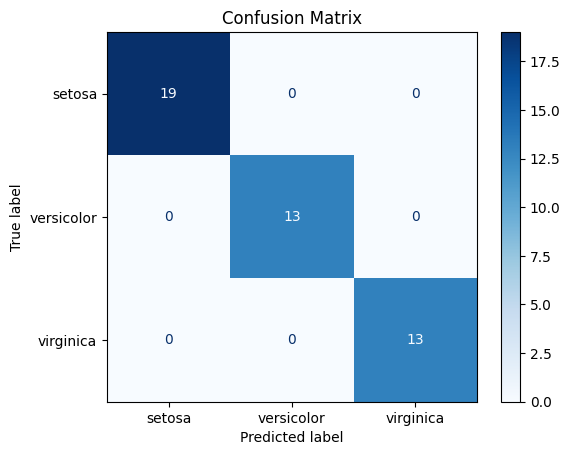

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0000


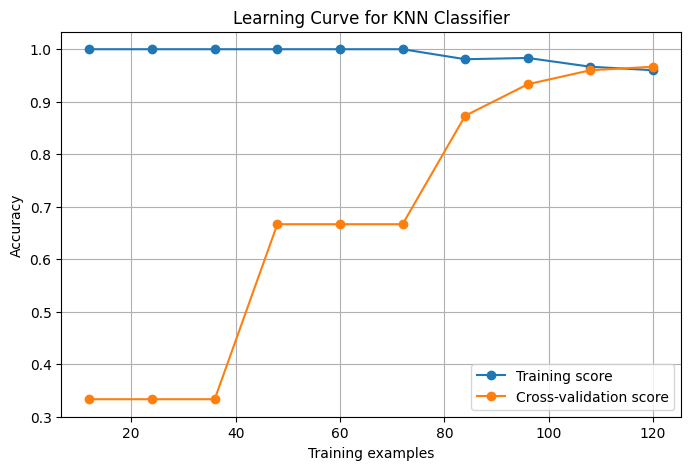

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score


data = load_iris()
X = data.data
y = data.target
target_names = data.target_names


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)

# Confusion matrix, and learning curve

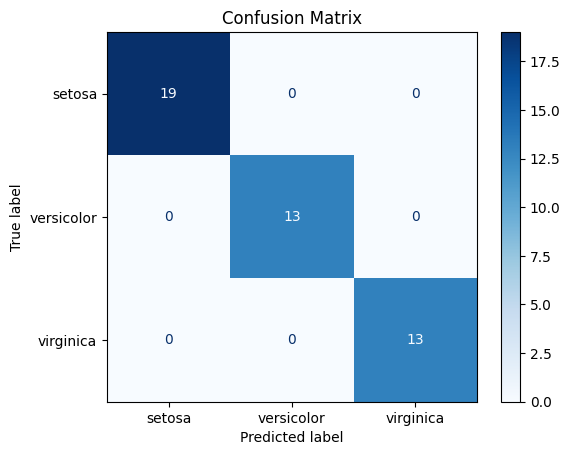

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0000


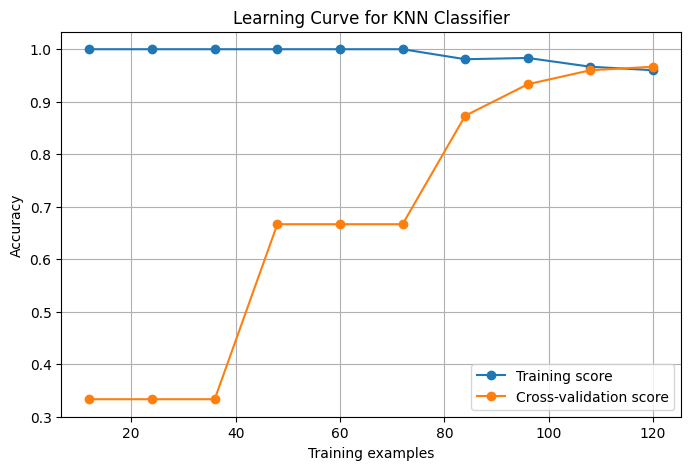

In [13]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


train_sizes, train_scores, test_scores = learning_curve(
    knn, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for KNN Classifier')
plt.legend(loc='best')
plt.grid()
plt.show()

# Test if model fit is optimal

In [8]:
# Evaluate model fit status based on learning curve
def evaluate_fit(train_scores_mean, test_scores_mean, threshold_gap=0.05, threshold_low=0.75):
    final_train = train_scores_mean[-1]
    final_val = test_scores_mean[-1]
    gap = final_train - final_val

    print("\n--- Fit Evaluation ---")
    print(f"Final Training Accuracy: {final_train:.4f}")
    print(f"Final Validation Accuracy: {final_val:.4f}")
    print(f"Train-Validation Gap: {gap:.4f}")

    if final_train < threshold_low and final_val < threshold_low:
        print("Model is likely **Underfitting**: Both training and validation accuracy are low.")
    elif gap > threshold_gap:
        print("Model is likely **Overfitting**: Training accuracy is high, but validation accuracy drops.")
    else:
        print("Model is likely a **Good Fit**: Training and validation accuracy are both high and close.")


evaluate_fit(train_scores_mean, test_scores_mean)



--- Fit Evaluation ---
Final Training Accuracy: 0.9600
Final Validation Accuracy: 0.9667
Train-Validation Gap: -0.0067
Model is likely a **Good Fit**: Training and validation accuracy are both high and close.


# Find best value for k

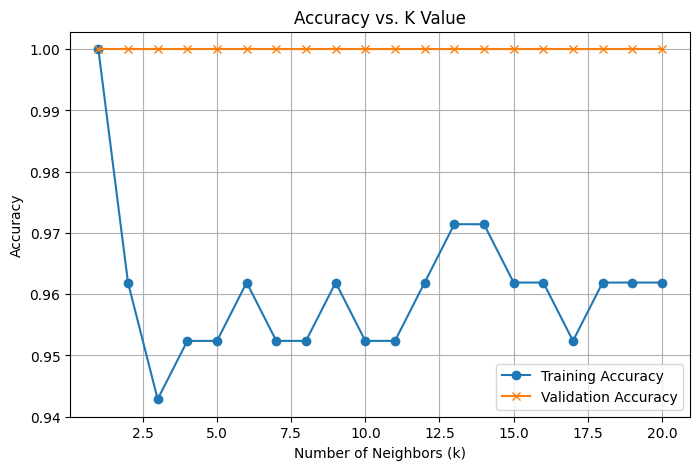

In [9]:
# Try different k values
k_range = range(1, 21)
train_acc = []
test_acc = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))


plt.figure(figsize=(8, 5))
plt.plot(k_range, train_acc, label='Training Accuracy', marker='o')
plt.plot(k_range, test_acc, label='Validation Accuracy', marker='x')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K Value')
plt.legend()
plt.grid(True)
plt.show()


# Determine ROC curve

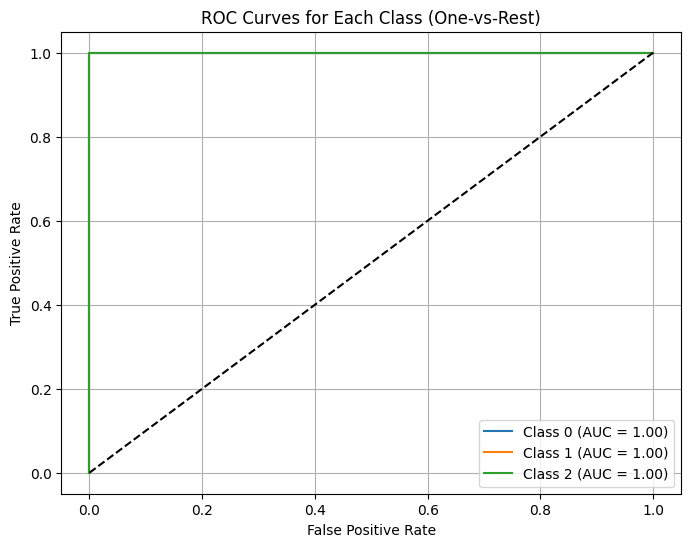

In [10]:
# imbalanced datasets
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay


y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]


classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=42)
classifier.fit(X_train, y_train_bin)
y_score = classifier.predict_proba(X_test)


plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves for Each Class (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


# Illustrate the feature space as a 2D representation

<ipython-input-11-67614474f7ce>:22: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, edgecolor='k', marker='x', label="Test")


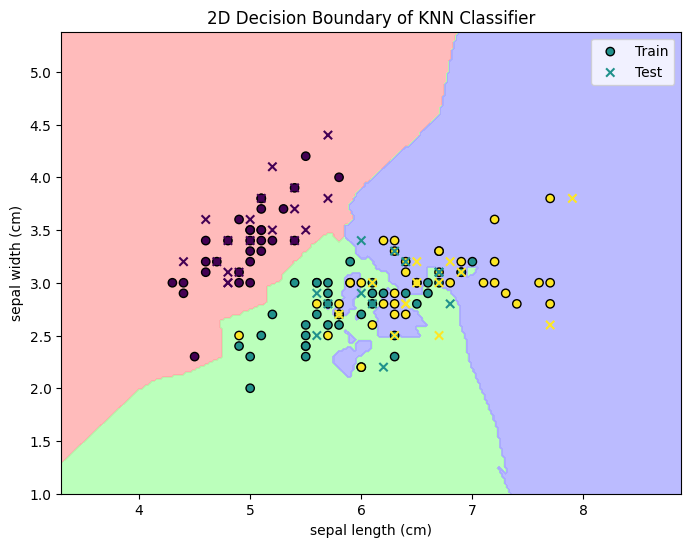

In [11]:
from matplotlib.colors import ListedColormap


X_vis = X[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis, y_train_vis)

h = .02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, edgecolor='k', marker='o', label="Train")
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, edgecolor='k', marker='x', label="Test")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("2D Decision Boundary of KNN Classifier")
plt.legend()
plt.show()


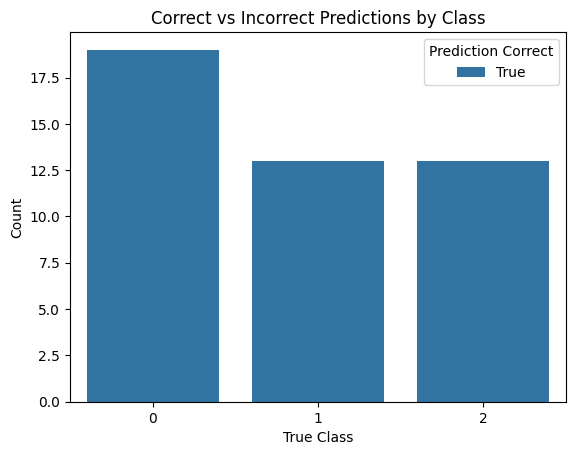

In [7]:
import pandas as pd

error_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
error_df['Correct'] = error_df['Actual'] == error_df['Predicted']

sns.countplot(x='Actual', hue='Correct', data=error_df)
plt.title("Correct vs Incorrect Predictions by Class")
plt.xlabel("True Class")
plt.ylabel("Count")
plt.legend(title='Prediction Correct')
plt.show()
